# Homework 3

# Load data

In [1]:
import json

In [10]:
d1 = json.load(open('logs/data5-stanley.json'))
d2 = json.load(open('logs/data5-pure.json'))
d3 = json.load(open('logs/data0.3-stanley.json'))
d4 = json.load(open('logs/data0.3-pure.json'))

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [12]:
duration = 50
Ts = 0.03

# Data Analysis

## 0.3 m/s

### Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2210


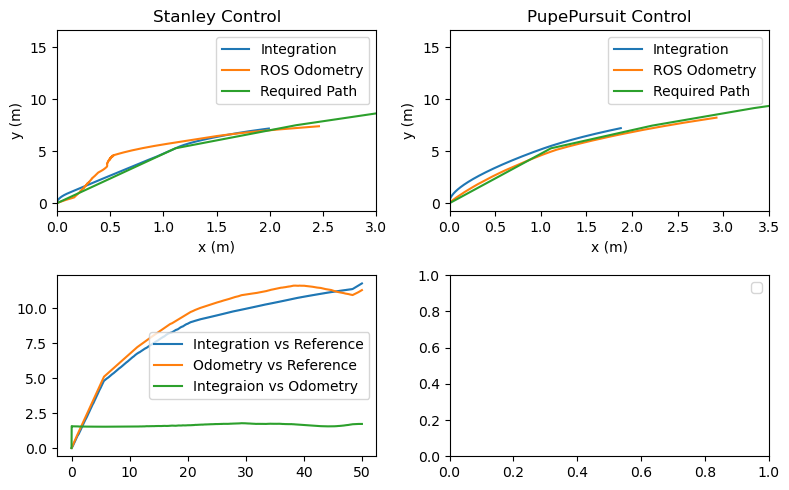

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(8, 5))
ax1, ax2, ax3, ax4 = ax.flatten()

qs = np.array([d3['qs']]).squeeze()
rqs = np.array([d3['rqs']]).squeeze()
ref = np.array([d3['cp']]).squeeze()
temp = interpolate.interp1d(ref[:, 0], ref[:, 1])
x = np.linspace(0, np.max(ref[:, 0]), len(qs))
ref = np.array([x, temp(x)]).T
eqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, qs)]
erqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, rqs)]
ei = [np.linalg.norm(u - v) for u, v in zip(qs, rqs)]
ts = np.linspace(0, duration, len(qs))


ax1.plot(qs[:, 0], qs[:, 1], label='Integration')
ax1.plot(rqs[:, 0], rqs[:, 1], label='ROS Odometry')
ax1.plot(ref[:, 0], ref[:, 1], label='Required Path')

ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_xlim([0, 3])
ax1.set_title('Stanley Control')

ax3.plot(ts, eqs, label='Integration vs Reference')
ax3.plot(ts, erqs, label='Odometry vs Reference')
ax3.plot(ts, ei, label='Integraion vs Odometry')

qs = np.array([d4['qs']]).squeeze()
rqs = np.array([d4['rqs']]).squeeze()
ref = np.array([d4['cp']]).squeeze()
eqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, qs)]
erqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, rqs)]
ei = [np.linalg.norm(u - v) for u, v in zip(qs, rqs)]
ts = np.linspace(0, duration, len(qs))


ax2.plot(qs[:, 0], qs[:, 1], label='Integration')
ax2.plot(rqs[:, 0], rqs[:, 1], label='ROS Odometry')
ax2.plot(ref[:, 0], ref[:, 1], label='Required Path')

ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_xlim([0, 3.5])
ax2.set_title('PupePursuit Control')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.tight_layout()
plt.show()

### Analysis

As we can see, purepursuit have a more stable result.

## 5 m/s

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

i = 0
for data in [data0, data1, data2]:
    qs = np.array([data['qs']]).squeeze()
    rqs = np.array([data['rqs']]).squeeze()
    ref = np.array([data['cp']]).squeeze()

    if i == 0:
        ax[i].plot(qs[:, 0], qs[:, 1], label='Integration')
        ax[i].plot(rqs[:, 0], rqs[:, 1], label='ROS Odometry')
        ax[i].plot(ref[:, 0], ref[:, 1], label='Required Path')
    else:
        ax[i].plot(qs[:, 0], qs[:, 1])
        ax[i].plot(rqs[:, 0], rqs[:, 1])
        ax[i].plot(ref[:, 0], ref[:, 1])
        
    ax[i].set_title(f'Kp = {data["kp"]}, Kt = {data["ktheta"]}')
    ax[i].set_xlabel('x (m)')
    ax[i].set_ylabel('y (m)')
    i += 1

fig.legend()
plt.savefig('assets/trajectory.png', dpi=300)
plt.show()